# ニューラルネットワーク

本章では，DDPGの関数近似で用いられるニューラルネットワークの詳細やPythonプログラムでの扱い方を紹介します．


## 基本的な構造

DDPGなどの強化学習では，一般的に非常にシンプルなニューラルネットワークネットワークが用いられます．
ニューラルネットワークでは，関数への入力$x$に対して，層と呼ばれる関数の構造を複数回適用します．

以下，入力を$x \in \mathbb{R}^n$，出力を$y \in \mathbb{R}^m$とする，
単層のニューラルネットワークの式を示します．

$$
y = g(xW+b),\ W \in \mathbb{R}^{n \times m}, b \in \mathbb{R}^{1 \times m}
$$

ここで関数$g:\mathbb{R} \rightarrow \mathbb{R}$は **活性化関数** と呼ばれる非線形関数であり，
引数がベクトルや行列の際は各要素ごとに適用されます．

また，2層ニューラルネットワークは，以下の式で表されます．

$$
h = g^{(0)}(xW^{(0)}+b^{(0)}),\\
y = g^{(1)}(hW^{(1)}+b^{(1)}).
$$

これらを繰り返すことにより，多層ニューラルネットワークを構成することが出来ます．
多層ニューラルネットワークにおいては，
入力に近い層を **入力層** ，
出力に近い層を **出力層** ，
中間的な層を **中間層** と呼びます．

ニューラルネットワークは様々な関数を近似する表現能力を有しています．

## ニューラルネットワークの最適化

ニューラルネットワークで構成された関数$y=f(x;\omega)$を考えます．
ここで$x$は入力で$y$は出力，$\omega$はパラメータを表します．
このニューラルネットワークに対して，何かしらの損失関数というものを考えます．
例えば，$y=f(x;\omega)$で$\mathcal{D} = \{(\hat{x}_0,\hat{y}_0),(\hat{x}_1,\hat{y}_1),\cdots,(\hat{x}_k,\hat{y}_k)\}$
というデータを近似したいと考えると，以下のような損失関数を考えることが出来ます．

$$
L(\omega;\mathcal{D}) = \frac{1}{|\mathcal{D}|} \sum_{n=0} \left( \hat{y}_n - f(\hat{x}_n;\omega) \right)^2
$$ (nn_loss)

また，損失関数のパラメータ$\omega$に対する勾配$\nabla_\omega L(\omega;\mathcal{D})$が分かれば，
勾配ベースの手法により，この関数を最小化することができます．

ここでは，詳細は説明しませんが，
ニューラルネットワークフレームワークと呼ばれる，ニューラルネットワークを扱うプログラムの多くは，
**自動微分(Automatic Differentiation)** と呼ばれる機能を提供しています．
これを用いるとプログラムで構成された式(例えば式{eq}`nn_loss`など)に対する勾配を自動的に計算できます．

また，それら勾配を用いて勾配ベースの手法により，
損失関数を最適化するツールも提供されています．

## 実装

本節では，実際にニューラルネットワークの一種である **PyTorch** を用いて，

1. ニューラルネットワークを構成
2. 損失関数を設定
3. 損失関数の最小化

という流れの実装を行っていきます．

In [28]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

本節では，入力/出力ともに1次元の，3層のニューラルネットワークを構成してみます．
ネットワークを式で表すと以下のようになります．

$$
h^{(0)} &= \text{ReLU}(xW^{(0)}+b^{(0)}),\\
h^{(1)} &= \text{ReLU}(h^{(0)}W^{(1)}+b^{(1)}),\\
y &= h^{(1)}W^{(2)}+b^{(2)}.
$$

各パラメータの次元は以下のようになります．

$$
&W^{(0)} \in \mathbb{R}^{1 \times 256}, b^{(0)} \in  \mathbb{R}^{256}, h^{(0)} \in \mathbb{R}^{256} \\
&W^{(0)} \in \mathbb{R}^{256 \times 256}, b^{(0)} \in  \mathbb{R}^{256}, h^{(0)} \in \mathbb{R}^{256} \\
&W^{(0)} \in \mathbb{R}^{256 \times 1}, b^{(0)} \in  \mathbb{R}^{1}, h^{(0)} \in \mathbb{R}^{1}
$$

ここで，$\text{ReLU}(\cdot)$は，活性化関数であり，入力と出力の関係は以下グラフのようになります．

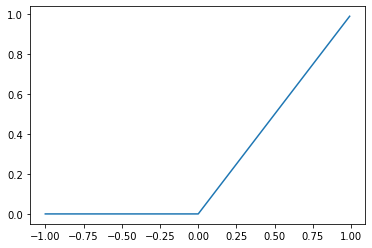

In [29]:
x = torch.arange(-1, 1, 0.01)
y = F.relu(x)
plt.plot(x, y)
plt.show()


このネットワークをクラスで実装すると以下のようになります．

In [30]:
class Network(nn.Module):  ## nn.Moduleを継承
    def __init__(self) -> None:
        super().__init__()
        # 各層を初期化
        self.linear0 = nn.Linear(1, 256)
        self.relu0 = nn.ReLU()
        self.linear1 = nn.Linear(256, 256)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(256, 1)

    def forward(self, x):
        """入力から出力を計算する関数"""
        h0 = self.relu0(self.linear0(x))  # 入力層
        h1 = self.relu1(self.linear1(h0))  # 中間層
        y = self.linear2(h1)  # 出力層
        return y


f = Network()
print(f)


Network(
  (linear0): Linear(in_features=1, out_features=256, bias=True)
  (relu0): ReLU()
  (linear1): Linear(in_features=256, out_features=256, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=256, out_features=1, bias=True)
)


このネットワークをプロット$x \in [-\pi,\pi]$の範囲すると，以下のようになります．

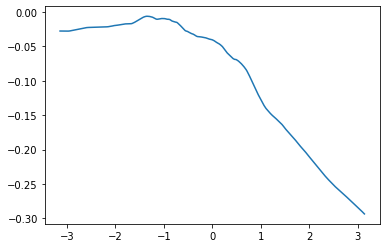

In [31]:
x = torch.arange(-torch.pi, torch.pi, 0.01)[..., None]
y = f(x)
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()


この関数を

$$y = sin(x)$$

にフィッティングすることを考えます．

教師データを 20 個生成し，それに対する平均二乗和誤差を計算する関数を実装します．


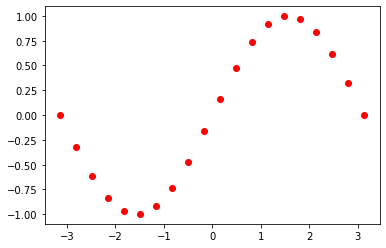

In [32]:
# 教師データを生成
x_t = torch.linspace(-torch.pi, torch.pi, 20)[..., None]
y_t = torch.sin(x_t)

plt.scatter(x_t, y_t, color="red")
plt.show()


In [33]:
# 損失関数を計算
def compute_loss(f: Network):
    # yの予測値を計算
    y_pred = f(x_t)

    # 平均二乗和誤差を計算
    loss = F.mse_loss(y_pred, y_t)
    return loss


print(compute_loss(f))


tensor(0.5868, grad_fn=<MseLossBackward0>)


最適化器を用意します．
本稿では強化学習でよく用いられる Adam という最適化手法を用います．


In [34]:
optimizer = optim.Adam(f.parameters(), lr=1e-3)  # 引数に最適化対象のパラメータと学習率を与える


それでは，これらを用いて，100ステップ最適化を行います．

In [35]:
for i in range(100):
    loss = compute_loss(f)  # 損失を計算
    optimizer.zero_grad()  # 保存されている勾配情報を初期化
    loss.backward()  # 損失のパラメータに対する勾配を計算
    optimizer.step()  # 1ステップ最適化する


結果をプロットすると以下のようになります．


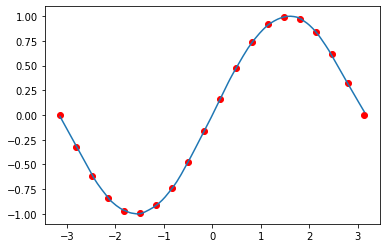

In [36]:
x = torch.arange(-torch.pi, torch.pi, 0.01)[..., None]
y = f(x)
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.scatter(x_t, y_t, color="red")
plt.show()
